# IMPORTING THE LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTING THE DATASETS

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# there is not a dependent variable or a priori while clustering
# so there will be only one varible split and that is for feature matrix.
x = dataset.iloc[:, 3:].values

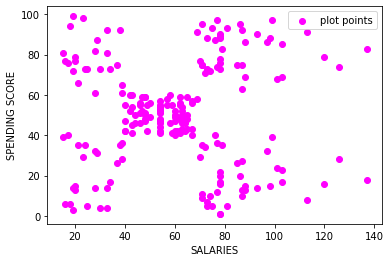

In [4]:
plt.scatter(x[:, 0], x[:, 1], color='magenta', label='plot points')
plt.xlabel('SALARIES')
plt.ylabel('SPENDING SCORE')
plt.legend()
plt.show()

# USING THE ELBOW METHOD TO FIND THE OPTIMAL K(CLUSTERS)

C:\Users\rajat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


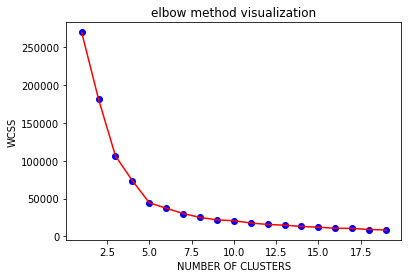

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    del kmeans
plt.scatter(range(1, 20), wcss, color='blue')
plt.plot(range(1, 20), wcss, color='red')
plt.title('elbow method visualization')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

# TRAINING THE K-MEANS CLUSTERING MODEL

In [6]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = kmeans2.fit_predict(x)

In [7]:
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# VISUALIZING THE CLUSTERS

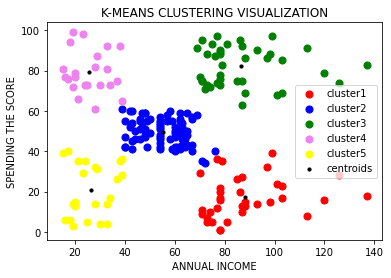

In [8]:
plt.scatter(x[y==0, 0], x[y==0, 1], s=50, color='red', label='cluster1')
plt.scatter(x[y==1, 0], x[y==1, 1], s=50, color='blue', label='cluster2')
plt.scatter(x[y==2, 0], x[y==2, 1], s=50, color='green', label='cluster3')
plt.scatter(x[y==3, 0], x[y==3, 1], s=50, color='violet', label='cluster4')
plt.scatter(x[y==4, 0], x[y==4, 1], s=50, color='yellow', label='cluster5')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
            s=10, color='black', label='centroids')
plt.title('K-MEANS CLUSTERING VISUALIZATION')
plt.xlabel('ANNUAL INCOME')
plt.ylabel('SPENDING THE SCORE')
plt.legend()
plt.show()